# [FinalExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, July 14, 2022.**

**Student Name**  : Felicia Ferren        
**Student ID**    : 2440013071         
**Video Link**    :
- https://binusianorg-my.sharepoint.com/personal/felicia_ferren_binus_ac_id/_layouts/15/guestaccess.aspx?share=EVmxLB_3B8xMt_a1a-ewVzsB5k7MBTNiUiU7PogNS3l6pw&e=gMBHJD 
- https://youtu.be/dQBofTi4YPQ (alternative)

* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:** 
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the neccessary Libraries and Data (2 pts.)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
# reading the data from csv file
chicago_crime = pd.read_csv("OddID.csv")

# make a copy of our dataset
crime = chicago_crime.copy()

## 2. Data Exploration (15 pts.)

In [3]:
# display the head of the data
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,03/12/2018 07:32:00 PM,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,05/29/2016 11:28:00 PM,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,03/16/2019 02:10:00 AM,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,10/05/2017 11:00:00 AM,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,02/26/2018 07:51:00 PM,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"


In [4]:
# shape of the data
crime.shape

(1031744, 23)

we can see that there are 1031743 crime records with 23 columns.

In [5]:
# statistics summary of the data
crime.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.031744e+06,1.031744e+06,1.031744e+06,1.031743e+06,1.031738e+06,1.031742e+06,1.019181e+06,1.019181e+06,1.031744e+06,1.019181e+06,1.019181e+06
mean,5.734502e+05,1.081694e+07,1.144468e+03,1.121607e+01,2.316172e+01,3.686135e+01,1.164729e+06,1.886285e+06,2.016676e+03,4.184356e+01,-8.767101e+01
std,3.308943e+05,7.250323e+05,6.942233e+02,6.934780e+00,1.398308e+01,2.141199e+01,1.622861e+04,3.118423e+04,1.248647e+00,8.576025e-02,5.908040e-02
min,0.000000e+00,2.171400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.092706e+06,1.813897e+06,2.015000e+03,4.164459e+01,-8.793427e+01
25%,2.869228e+05,1.040797e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152955e+06,1.859226e+06,2.016000e+03,4.176901e+01,-8.771377e+01
50%,5.737245e+05,1.087063e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166471e+06,1.893489e+06,2.017000e+03,4.186338e+01,-8.766459e+01
75%,8.598735e+05,1.127863e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176417e+06,1.908739e+06,2.018000e+03,4.190535e+01,-8.762788e+01
max,1.146380e+06,1.168250e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.019000e+03,4.202267e+01,-8.752453e+01


In [6]:
# taking information from the attributes
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028477 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031738 non-null  float64
 14  Community Area        1031742 non-

the data type of the features are also variative!   
dtypes: bool(2), float64(7), int64(4), object(10)   

In [7]:
# non-categorical variables
noncat = crime._get_numeric_data().columns
print(list(noncat))

['Unnamed: 0', 'ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


In [8]:
# categorical variables
print(list(set(crime.columns) - set(noncat)))

['Location', 'IUCR', 'Location Description', 'Date', 'FBI Code', 'Description', 'Block', 'Updated On', 'Primary Type', 'Case Number']


we have so many features in this dataset. there are also object data type... that might need to be transformed. we won't be using all the features.

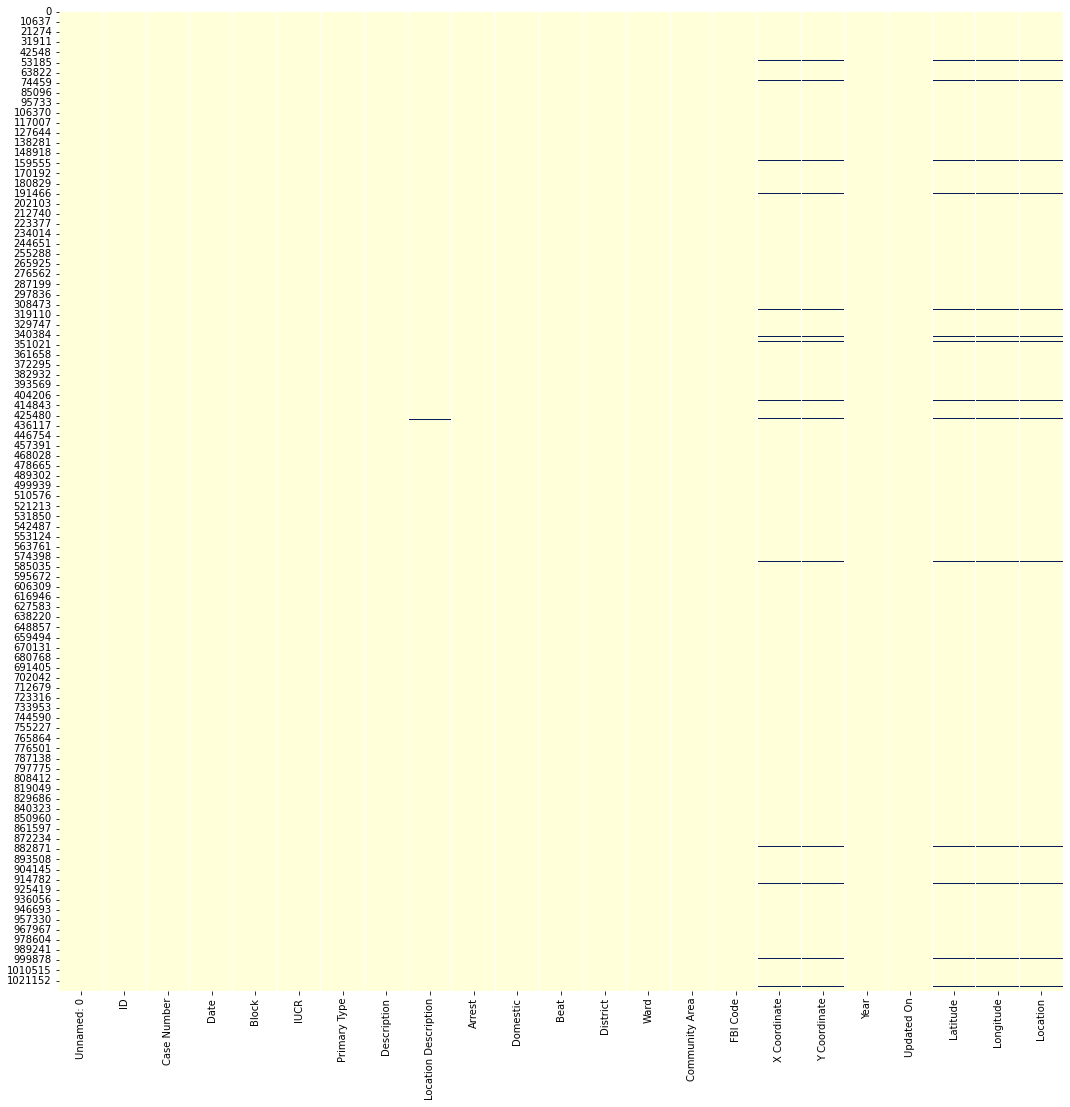

In [9]:
# check missing values (visualization)

plt.figure(figsize=(18,18))
sns.heatmap(crime.isna(), cbar = False, cmap = 'YlGnBu')

We see that there are many null values in Location Description, X Coordinate, Y Coordinate, Latitude, Longitude, and Location variables. These variables are related to the geographical location where the crime occured, which not directly used as final dataset.

In [10]:
# check missing values (in numbers)
crime.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3267
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        6
Community Area              2
FBI Code                    0
X Coordinate            12563
Y Coordinate            12563
Year                        0
Updated On                  0
Latitude                12563
Longitude               12563
Location                12563
dtype: int64

there are other features having null values such as District, Ward, and Community Area. we can just remove them because they're only small amount of values against the 1m records.

along with null values in the variables mentioned before, we will just remove these records of data because they wont influence our model... will be removed in the data preprocessing/preparation section.

we will be converting Date column into a proper time format for further analysis.

In [11]:
# re-arrange the dataframe column Date to actual datetime format
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
1,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
3,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
4,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"


In [12]:
# set the date as our index
crime.index = pd.DatetimeIndex(crime.Date)
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-12 19:32:00,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
2016-05-29 23:28:00,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2019-03-16 02:10:00,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,9.0,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)"
2017-10-05 11:00:00,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
2018-02-26 19:51:00,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"


Let's see top 10 criminal types from our dataset.

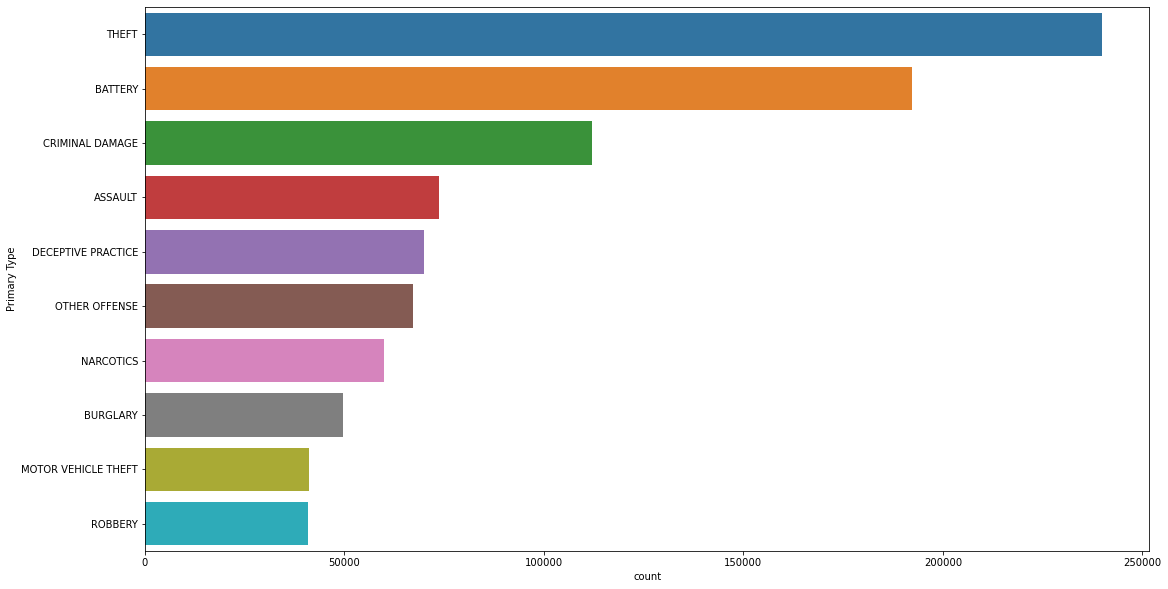

In [13]:
# criminal types visualization
plt.figure(figsize = (18,10))
sns.countplot(y='Primary Type', data = crime, order = crime['Primary Type'].value_counts().iloc[:10].index)

In [14]:
# crime types (in numbers)
crime['Primary Type'].value_counts()

THEFT                                239736
BATTERY                              192163
CRIMINAL DAMAGE                      112110
ASSAULT                               73787
DECEPTIVE PRACTICE                    70056
OTHER OFFENSE                         67255
NARCOTICS                             59880
BURGLARY                              49577
MOTOR VEHICLE THEFT                   41165
ROBBERY                               40975
CRIMINAL TRESPASS                     25644
WEAPONS VIOLATION                     16915
OFFENSE INVOLVING CHILDREN             9021
PUBLIC PEACE VIOLATION                 6686
CRIM SEXUAL ASSAULT                    6088
INTERFERENCE WITH PUBLIC OFFICER       4578
SEX OFFENSE                            3989
PROSTITUTION                           3388
HOMICIDE                               2433
ARSON                                  1694
LIQUOR LAW VIOLATION                    941
GAMBLING                                814
KIDNAPPING                      

Theft, Battery, and Criminal Damage are the crimes dominating in our data.

Then, try to visualize the top 10 location of the crime:

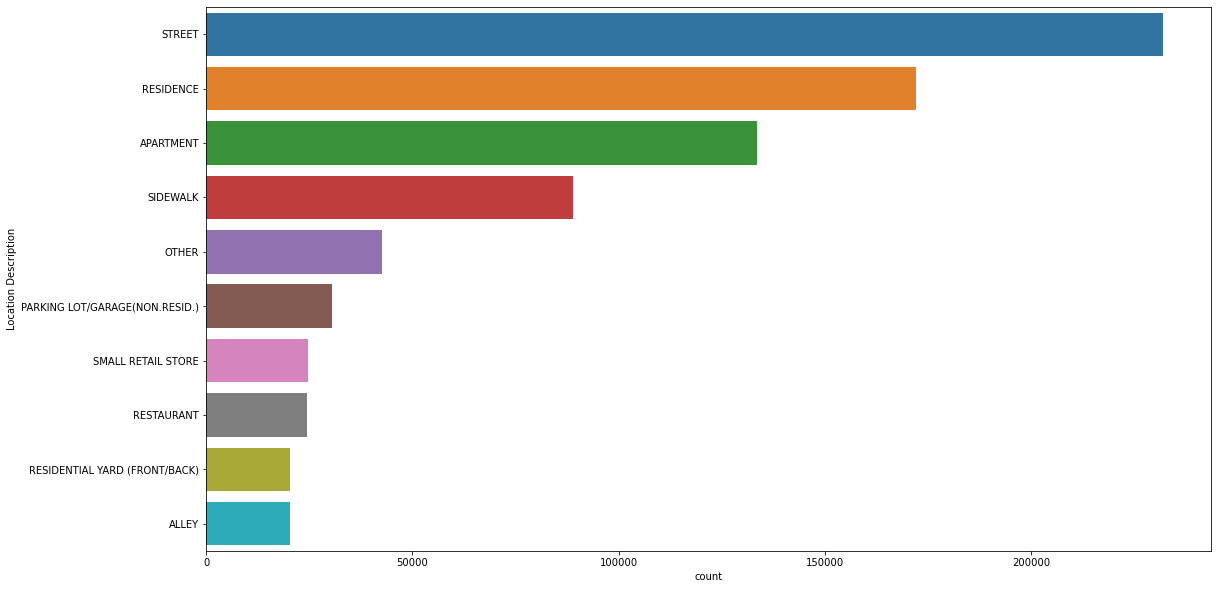

In [15]:
# criminal location visualization top 10
plt.figure(figsize = (18,10))
sns.countplot(y='Location Description', data = crime, order = crime['Location Description'].value_counts().iloc[:10].index)

street, residence, and apartment dominates our data.

Now we will see the visualizations of the total crime:
- per year
- per months

In [16]:
# find out the start and end date of our data
print('Start Date: ', str(crime.Date.describe()['first']))
print('End Date: ', str(crime.Date.describe()['last']))

Start Date:  2015-01-01 00:00:00
End Date:  2019-05-03 23:40:00


In [17]:
# for total crime visualization per year, we wont be using the 2019-2020 period because the data is not in a full year
crime_2016_2019 = crime[crime['Date'] <= '2018-12-31']

crime_2016_2019

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-12 19:32:00,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1.0,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)"
2016-05-29 23:28:00,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,3.0,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
2017-10-05 11:00:00,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,2.0,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)"
2018-02-26 19:51:00,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,20.0,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)"
2018-06-16 07:00:00,954838,11349522,JB309088,2018-06-16 07:00:00,063XX N WAYNE AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,...,40.0,77.0,06,1166144.0,1942240.0,2018,06/23/2018 03:54:12 PM,41.997089,-87.664177,"(41.997089263, -87.664176814)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-19 20:10:00,540482,11182652,JA556030,2017-12-19 20:10:00,076XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,8.0,69.0,08B,1183553.0,1854644.0,2017,05/04/2018 03:51:04 PM,41.756331,-87.602879,"(41.756330877, -87.602879293)"
2017-03-16 13:00:00,750276,10880463,JA189513,2017-03-16 13:00:00,028XX N MOBILE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,29.0,19.0,08B,1133917.0,1918303.0,2017,02/10/2018 03:50:01 PM,41.932034,-87.783294,"(41.932033636, -87.783293785)"
2015-07-18 21:30:00,122985,10157277,HY346558,2015-07-18 21:30:00,072XX S LOWE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,17.0,68.0,05,1173398.0,1856921.0,2015,02/10/2018 03:50:01 PM,41.762810,-87.640028,"(41.762809823, -87.640027854)"


Text(0, 0.5, 'Number of Crimes')

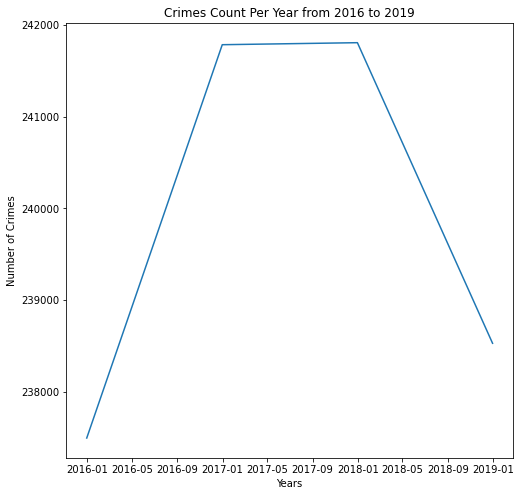

In [18]:
# visualization of crime count per year

plt.figure(figsize = (8, 8))
plt.plot(crime_2016_2019.resample('Y').size())
plt.title('Crimes Count Per Year from 2016 to 2019')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [19]:
crime.resample('Y').size()

Date
2015-12-31    237495
2016-12-31    241783
2017-12-31    241805
2018-12-31    239104
2019-12-31     71557
Freq: A-DEC, dtype: int64

the graphic above shows an increase of total crimes from 2016 to 2017, then constant until 2018, and decreasing to 2019.

Text(0, 0.5, 'Number of Crimes')

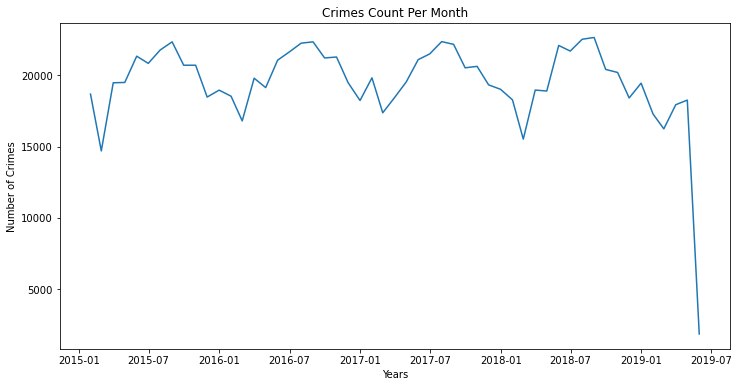

In [20]:
# visualization of crime count per month

plt.figure(figsize = (12, 6))
plt.plot(crime.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

roughly, we can say that the crimes rise around midyear.

Now, how about total crime per hour? this time using barplot.

In [21]:
def hour(x):
    return x.strftime("%H")
crime['Hour_Day'] = crime['Date'].apply(hour)

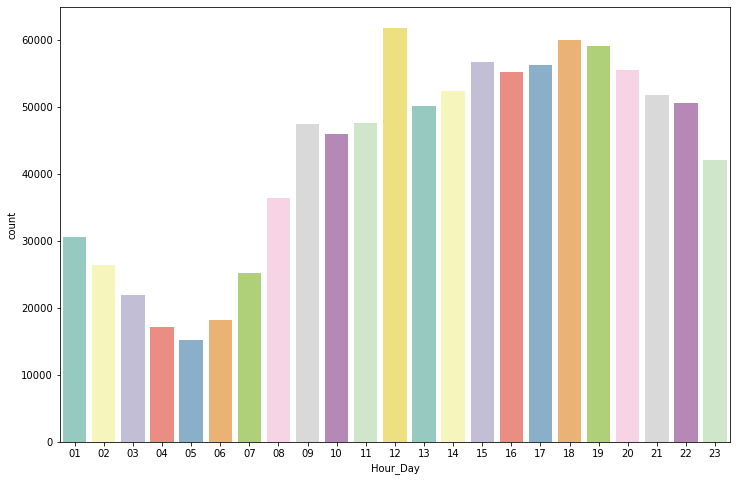

In [22]:
time_order = ['01', '02', '03', '04', '05', '06', '07', '08', '09', 
              '10', '11', '12', '13', '14', '15', '16', '17', '18', 
              '19', '20', '21', '22', '23']

plt.figure(figsize = (12, 8))
sns.countplot(x = 'Hour_Day', data=crime, palette="Set3", order = time_order)


crimes reduced after midnight and started to rise after dawn time.

summary for data exploration:
- our data is from 2015-01-01 until 2019-05-03
- type of crime is dominated with theft, battery, and criminal damage
- most common criminal location occurs on the street. 
- crime rises around midyear.
- crimes reduced after midnight and started to rise after dawn time.

## 3. Data Preparation (30 pts.)

First, we will be removing the null values.

In [23]:
# drop the nulls 
crime.dropna(inplace = True)

In [24]:
# re-check
crime.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour_Day                0
dtype: int64

features with null values are now removed!

Next, we will do feature engineering in order to generate the target variable - Crime Rate.  
We are only going to use features created from 'Date', 'District' and 'Primary Type' variables for the modelling.

In feature engineering:
    1. create new feature based on date feature (month, day, hour)
    2. encode categorical variables (primary type)

In [25]:
# reset index
crime.reset_index(drop = True, inplace = True)
crime.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour_Day
0,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,24.0,08A,1164432.0,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)",19
1,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,35.0,08B,1176730.0,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",23
2,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,49.0,03,1176072.0,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)",02
3,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,28.0,06,1163312.0,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)",11
4,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,42.0,26,1182717.0,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)",19


In [26]:
# creating new feature for month, day, and hour
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.dayofweek
crime['Hour'] = crime['Date'].dt.hour 

crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour_Day,Month,Day,Hour
0,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,...,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)",19,3,0,19
1,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",23,5,6,23
2,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)",02,3,5,2
3,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,THEFT,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)",11,10,3,11
4,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)",19,2,0,19


**note**:  
month: 1 - 12   
day: 0 - 6; where 0 = Monday   
hour: 0 - 23

In [27]:
# import libary for encoding and use label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# encode primary type
crime['Primary Type'] = label_encoder.fit_transform(crime['Primary Type'])

crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour_Day,Month,Day,Hour
0,1024161,11254362,JB183495,2018-03-12 19:32:00,017XX W CHICAGO AVE,0560,1,SIMPLE,RESTAURANT,False,...,1905388.0,2018,05/04/2018 03:51:04 PM,41.896002,-87.671521,"(41.896002063, -87.671521286)",19,3,0,19
1,428801,10540177,HZ285387,2016-05-29 23:28:00,027XX S STATE ST,0454,2,AGG PO HANDS NO/MIN INJURY,CHA APARTMENT,True,...,1886544.0,2016,02/10/2018 03:50:01 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",23,5,6,23
2,1099812,11624449,JC187320,2019-03-16 02:10:00,101XX S PRINCETON AVE,031A,28,ARMED: HANDGUN,STREET,False,...,1837879.0,2019,03/23/2019 04:03:16 PM,41.710497,-87.630797,"(41.710496583, -87.630796959)",02,3,5,2
3,595228,11109388,JA459177,2017-10-05 11:00:00,019XX W OGDEN AVE,0810,31,OVER $500,HOSPITAL BUILDING/GROUNDS,False,...,1897077.0,2017,02/10/2018 03:50:01 PM,41.873220,-87.675869,"(41.873219626, -87.675868666)",11,10,3,11
4,1033611,11241624,JB166623,2018-02-26 19:51:00,067XX S COTTAGE GROVE AVE,1330,7,TO LAND,GAS STATION,True,...,1860597.0,2018,05/04/2018 03:51:04 PM,41.772686,-87.605758,"(41.77268594, -87.605758495)",19,2,0,19


Then, group the dataset by 'Month', 'Day', 'Hour', 'District' and aggregate 'Primary Type'. This will be the dataset we use for prediction modelling.

In [28]:
# feature selection for prediction modelling; group by the month, day, hour, and district to count the number of crimes

new_crime = crime.groupby(['Month', 'Day', 'District', 'Hour'], as_index = False).agg({"Primary Type":"count"})
new_crime = new_crime.sort_values(by=['District'], ascending=False)
new_crime.head()

,Month,Day,District,Hour,Primary Type
22178,6,6,31.0,21,1
15840,5,1,31.0,9,1
32220,9,4,31.0,12,1
32219,9,4,31.0,10,1
11086,3,6,31.0,12,1


We have obtained the independent variables. So, let's take 14 as the threshold values for categorising the crimes as low and high crime rates, and label 0 - 2 for the alert as our target variable.

    0-14 : Low Crime Rate             >> 0 - low alert
    15-33 : Medium Crime Rate         >> 1 - medium alert
    34 and above : High Crime Rate    >> 2 - high alert

In [29]:
# Feature Engineer and create a new target feature
def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>15 and x<=33):
        return 1
    else:
        return 2
new_crime['Alert'] = new_crime['Primary Type'].apply(crime_rate_assign)
new_crime = new_crime[['Month','Day','Hour','District','Primary Type','Alert']]
new_crime.head()

,Month,Day,Hour,District,Primary Type,Alert
22178,6,6,21,31.0,1,0
15840,5,1,9,31.0,1,0
32220,9,4,12,31.0,1,0
32219,9,4,10,31.0,1,0
11086,3,6,12,31.0,1,0


now, we will check the proportion for each alert class:

In [30]:
new_crime['Alert'].value_counts() / len(new_crime)

1    0.483193
0    0.292062
2    0.224745
Name: Alert, dtype: float64

there is imbalance proportion for Alert class, we need to consider using stratified sampling method - for splitting the data.

now, prepare the data for machine learning modelling by split the data into train and test data and do scalling.

In [31]:
# import stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

# define 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Loop through each record and perform split by species proportion
for train_index, test_index in split.split(new_crime, new_crime['Alert']):
    strat_train_set = new_crime.reindex(train_index)
    strat_test_set = new_crime.reindex(test_index)

In [32]:
# check the test data proportion
strat_test_set['Alert'].value_counts() / len(strat_test_set)

1    0.479561
0    0.294109
2    0.226330
Name: Alert, dtype: float64

In [33]:
# check the train data proportion
strat_train_set['Alert'].value_counts() / len(strat_train_set)

1    0.484750
0    0.291185
2    0.224065
Name: Alert, dtype: float64

now, the data has been splitted with equal proportion

In [34]:
# copy the data 
X_train_strat = strat_train_set.copy()
X_test_strat = strat_test_set.copy()

# pop target variables
y_train_strat = X_train_strat.pop('Alert')
y_test_strat = X_test_strat.pop('Alert')

In [35]:
# scalling process (use standart scaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_strat = scaler.fit_transform(X_train_strat)
X_test_strat = scaler.transform(X_test_strat)

we also try using normal sampling, but adding Balanced Bagging Classifier which balance the training set at the time of fit for a given sampler.

In [36]:
# copy the data
X = new_crime[['Month', 'Day', 'Hour', 'District']] # independent
y = new_crime['Alert'] # dependent

In [37]:
# random sampling
from sklearn.model_selection import train_test_split

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Build and Assess the machine learning models (35 pts.)

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**. 

### First Model : K-Nearest Neighbours for Classification

for KNN, we will be tuning its hyperparameters for finding the best parameters to use.

In [39]:
# hyperparameters tuning

# Using K Nearest Neighbours for Classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# setting range of the number of neighbours
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_strat, y_train_strat)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [40]:
# find out the best parameters for KNN
print(grid_search.best_params_)

{'n_neighbors': 11}


In [41]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 93.75%


the accuracy result is very good, so we will use n_neighbors = 11 as our KNN parameter.

In [42]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

In [43]:
# define classifier
knn = KNeighborsClassifier(11)
# fit the model
knn.fit(X_train_strat, y_train_strat)

# predict
y_pred = knn.predict(X_test_strat)

print("by stratified sampling")
# Accuracy of the model
print("Accuracy:",(metrics.accuracy_score(y_test_strat, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test_strat, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\nConfusion Matrix: ")
print(cm)

# Classification Report
print("\nClassification Report: ")
print(classification_report(y_test_strat,y_pred))

by stratified sampling
Accuracy: 93.65795010519989 


Confusion Matrix: 
Predicted Alarm     0     1     2
Actual Alarm                     
0                3801   110     3
1                 102  6210    70
2                 199   360  2453

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3914
           1       0.93      0.97      0.95      6382
           2       0.97      0.81      0.89      3012

    accuracy                           0.94     13308
   macro avg       0.94      0.92      0.93     13308
weighted avg       0.94      0.94      0.94     13308



In [44]:
print("by random sampling + Balanced Bagging Classifier")
from imblearn.ensemble import BalancedBaggingClassifier

# define classifier
knn_bb = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(11),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
# fit the model
knn_bb.fit(X_train, y_train)

# predict
y_pred = knn_bb.predict(X_test)

# Accuracy of the model
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\nConfusion Matrix: ")
print(cm)

# Classification Report
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

by random sampling + Balanced Bagging Classifier
Accuracy: 67.88397956116621 


Confusion Matrix: 
Predicted Alarm     0     1     2
Actual Alarm                     
0                2664  1197    49
1                 555  5132   687
2                 127  1659  1238

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      3910
           1       0.64      0.81      0.71      6374
           2       0.63      0.41      0.50      3024

    accuracy                           0.68     13308
   macro avg       0.69      0.63      0.65     13308
weighted avg       0.68      0.68      0.67     13308



because there is imbalance proportion in the target class, it is reasonable to receive lower accuracy on the train and test data with normal random sampling. 

Interpretation on each model:
- The first model (with stratified sampling) classifies the Alert class very well, denoted with 93.66% accuracy. The high alert label is at the best on precision (or exactness) but at worst on recall (or completeness.. regarding to its low proportion). Then, the f1-score is equal between label 0 and label 1 (low and medium alert).  
- The second model (with random sampling) classifies the Alert class poorly, denoted with 67.88% accuracy. As mentioned before, imbalance proportion terribly impacting the accuracy. the f1-score in label 2 (high alert) is very low.

### Second Model : Random Forest for Classification

In [45]:
# Using Random Forest for classification
from sklearn.ensemble import RandomForestClassifier

# define classifier
r_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# fit the model
r_forest.fit(X_train_strat, y_train_strat)

# predict
y_pred = r_forest.predict(X_test_strat)

print("by stratified sampling")
# Accuracy of the model
print("Accuracy:",(metrics.accuracy_score(y_test_strat, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test_strat, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\nConfusion Matrix: ")
print(cm)

# Classification Report
print("\nClassification Report: ")
print(classification_report(y_test_strat,y_pred))

by stratified sampling
Accuracy: 100.0 


Confusion Matrix: 
Predicted Alarm     0     1     2
Actual Alarm                     
0                3914     0     0
1                   0  6382     0
2                   0     0  3012

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       1.00      1.00      1.00      6382
           2       1.00      1.00      1.00      3012

    accuracy                           1.00     13308
   macro avg       1.00      1.00      1.00     13308
weighted avg       1.00      1.00      1.00     13308



In [46]:
print("by random sampling + balanced bagging classifier")

# define classifier
r_forest_bb = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)

# fit the model
r_forest_bb.fit(X_train, y_train)

# predict
y_pred = r_forest_bb.predict(X_test)

# Accuracy of the model
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\nConfusion Matrix: ")
print(cm)

# Classification Report
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

by random sampling + balanced bagging classifier
Accuracy: 76.87856928163511 


Confusion Matrix: 
Predicted Alarm     0     1     2
Actual Alarm                     
0                3127   760    23
1                 419  5370   585
2                 138  1152  1734

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3910
           1       0.74      0.84      0.79      6374
           2       0.74      0.57      0.65      3024

    accuracy                           0.77     13308
   macro avg       0.78      0.74      0.75     13308
weighted avg       0.77      0.77      0.77     13308



the result is way better by using Random Forest. It is shown that accuracy on both model is higher than model using KNN, especially when we did random sampling. 

Interpretation on each model:
- The first model (with stratified sampling) perfectly classifies the Alert class, denoted with 100% accuracy.
- The second model (with random sampling) is good in classifying the Alert class, denoted with 76.88% accuracy. Still the same as before, imbalance proportion impacted very much to the result. The precision, recall, and f1-score is the worst in label 2 - high alert.

## 5. Choose your Final Model (3 pts.)

**You finally have your final model. Write comments to justify your final model**

**The final model chosen is the second model (or model using Random Forest for Classification).** It is chosen as our final model because the metrics score/result using this model, from accuracy to f1-score, has better results. This better results indicates that the model can classify the target variable (Alert class) better than the other one.

Hope this model will be useful for developing more effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month; which classified into low, medium, and high crime alert.

Thank you!